<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основной-информации-о-датасетах" data-toc-modified-id="Изучение-основной-информации-о-датасетах-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение основной информации о датасетах</a></span></li><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разбиение данных</a></span></li><li><span><a href="#Создание-трансформера-для-преобразования-данных" data-toc-modified-id="Создание-трансформера-для-преобразования-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создание трансформера для преобразования данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Разработка метода преобразования для защиты персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании. Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обоснуем корректность его работы.

Нам нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

In [1]:
# Импортируем основные библиотеки для работы
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Импортируем модели, метрики, вспомогательные инструменты и функции
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

# warnings.filterwarnings("ignore", category=FutureWarning) 

pd.set_option('display.max_columns', None)

random_state = 42

np.random.seed(random_state)

## Подготовка данных

### Изучение основной информации о датасетах

Откроем файл и сохраним его в переменной `df`, получим основную информацию с помощью метода .info() и построим гистограммы для всех признаков датасета.

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


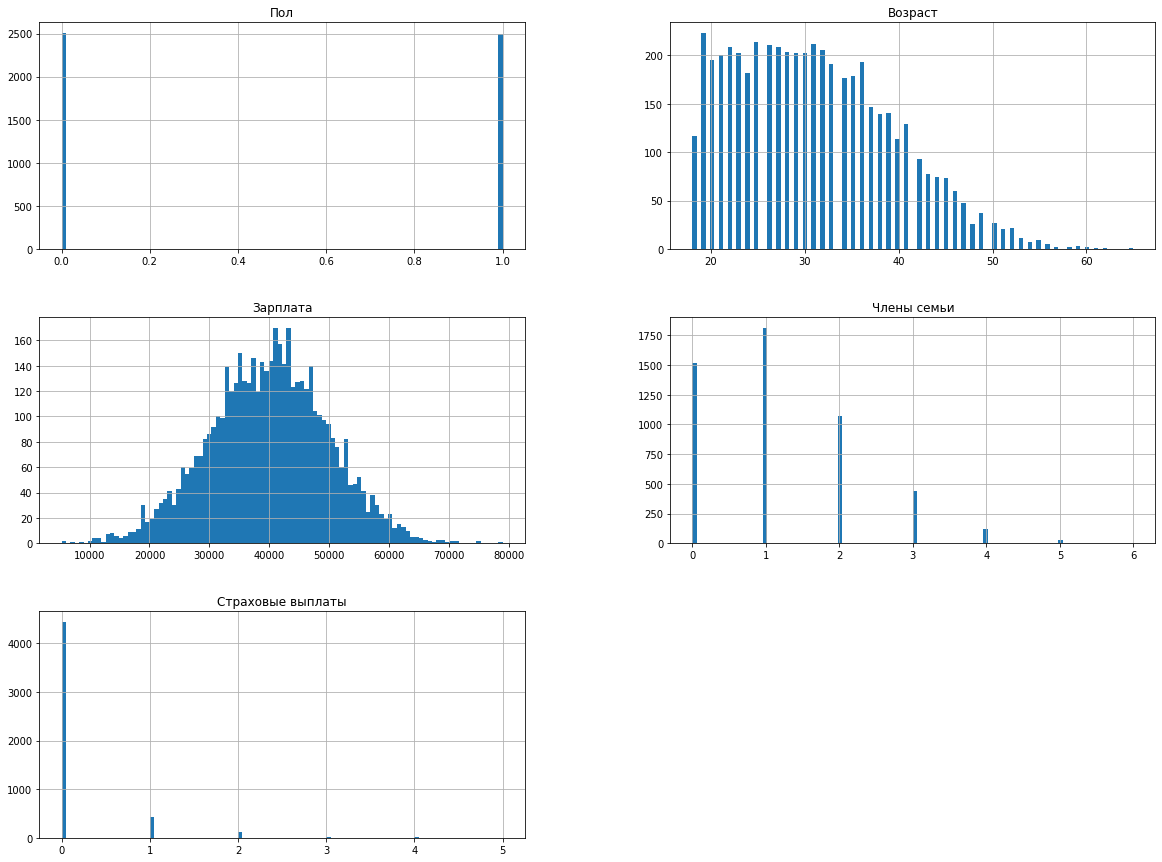

In [5]:
df.hist(figsize=(20, 15), bins=100)
plt.show()

In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


---
**Вывод:** изучив основную информацию о датасете, можно утверждать, что
- столбцы имеют русские имена, приведём их к английским - для удобства; 
- в данных нет пропусков;
- на всякий случай имеет смысл проверить данные на дубликаты;
- в данных нет экстремальных значений и явных выбросов;
- необходимо проверить данные на мультиколлинеарность.

### Переименование столбцов

Переименуем столбцы для нашего дальнейшего удобства.

In [7]:
df = df.rename(
    columns={
        'Пол' : 'sex',
        'Возраст' : 'age',
        'Зарплата' : 'wage',
        'Члены семьи' : 'family_members',
        'Страховые выплаты' : 'insurance_payments'
    }
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   wage                5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_payments  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


### Поиск дубликатов

Произведём поиск явных дубликатов:

In [9]:
df.duplicated().sum()

153

In [10]:
df[df.duplicated()].head()

,sex,age,wage,family_members,insurance_payments
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0


Избавимся от дубликатов.

In [11]:
print(f'Количество строк до удаления дубликатов: {df.shape[0]}.')
df = df.drop_duplicates()
print(f'Количество строк после удаления дубликатов: {df.shape[0]}.')

Количество строк до удаления дубликатов: 5000.
Количество строк после удаления дубликатов: 4847.


### Проверка на мультиколлинеарность

Проверим линейные корреляции признаков нашего датасета:

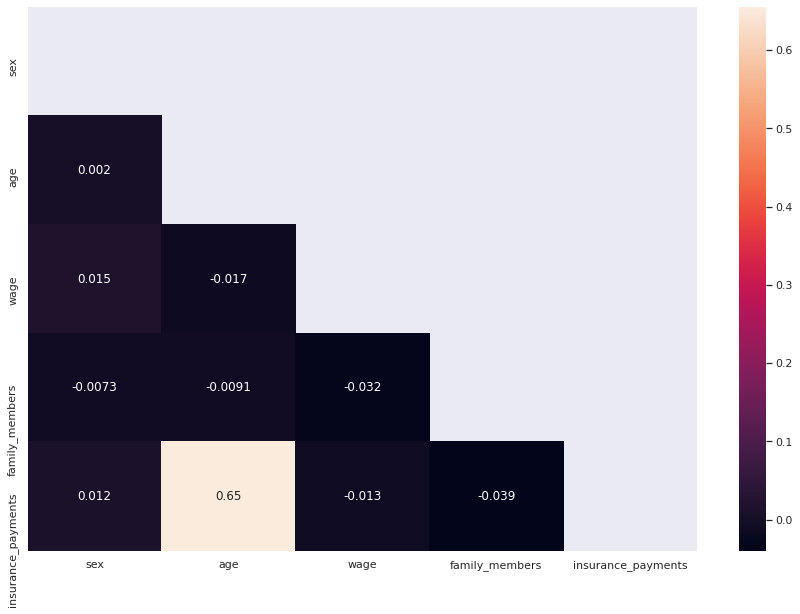

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, mask=np.triu(np.ones_like(df.corr())))
plt.show()

Как мы видим, сильных корреляций между признаками нет (исключая среднюю корреляцию между целевым признаком и возрастом); проблемы мультиколлинеарности в данных нет.

---
**Вывод**: закончив этап подготовки данных, мы
- привели названия столбцов к английским - для удобства; 
- не обнаружили пропусков;
- проверили данные на дубликаты, обнаружили и удалили их (153 строки из 5000);
- не обнаружили явных выбросов;
- проверили данные на мультиколлинеарность - её нет.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Не изменится.

**Обоснование:** 

Допустим, 

$$
X' = XP 
$$

Тогда 

$$
a' = X'w' 
$$

И формула обучения

$$
w' = (X'^T X')^{-1} X'^T y =
 ((X P)^T X P)^{-1} (X P)^T y = 
 P^{-1} ((X P)^T X)^{-1} (X P)^T y = 
 P^{-1} (P^T X^T X)^{-1} (X P)^T y = 
 P^{-1} (X^T X)^{-1} (P^T)^{-1} (X P)^T y =
 P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y =
 P^{-1} (X^T X)^{-1} E X^T y = 
 P^{-1} (X^T X)^{-1} X^T y = 
 P^{-1} w 
$$

Подставляя вектор весов $ w' $ в $ a' $:
$$
a' = X'w' = X P P^{-1} w = X E w = Xw = a
$$
Отсюда мы видим, что предсказания для признаков, умноженных на обратимую матрицу остаются такими же. Значит, качество линейной регрессии не изменится.

В качестве альтернативы рассмотрим доказательство через тождественность задачи обучения.

Возьмём

$$
w = \arg\min_w MSE(Xw, y)
$$

Тогда

$$
w' = \arg\min_w MSE(X'w', y) = \arg\min_w MSE(XPw', y)
$$

Подставляя найденный нами $ w' = P^{-1} w $ в задачу обучения $ w' $:

$$
w' = \arg\min_w MSE(XP P^{-1}w, y) = \arg\min_w MSE(XEw, y) = \arg\min_w MSE(Xw, y)
$$

Как мы видим, задача обучения для преобразованной и исходной матрицы одна и та же, что и требовалось доказать.

## Алгоритм преобразования

Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.

**Алгоритм**

1) Отделим целевой признак от набора данных; сохраняем набор признаков в качестве матрицы nxm, где n - количество строк, а m - количество признаков;

2) Генерируем случайную квадратную матрицу mxm, проверяем, чтобы она была обратима;

3) Сохраним обратную матрицу случайной квадратной матрицы - для дешифровки в будущем;

4) Перемножаем матрицу признаков на случайную квадратную матрицу, получаем зашифрованную матрицу признаков nxm.

**Обоснование**

Поскольку выше мы уже изучили вопрос изменения предсказаний для признаков, умноженных на обратимую матрицу, можно утверждать, что предсказания остаются неизменными и качество линейной регрессии не меняется.

Необходимо только позаботиться, чтобы преобразованная матрица признаков совпадала по своей форме с исходной - для этого необходимо сгенерировать именно квадратную обратимую матрицу mxm, где m - количество признаков исходной матрицы.

## Проверка алгоритма

### Разбиение данных

Разобьем набор данных на признаки и целевой признак и подготовим непреобразованные обучающие и тестовые наборы данных.

Мы не создаём валидационную выборку, поскольку по условию задачи нам не нужно подбирать лучшую модель.

In [13]:
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    train_size=0.8,
    random_state=random_state)

### Создание трансформера для преобразования данных

Мы создадим отдельный класс трансформера для преобразования наших данных в пайплайнах.

Для начала, напишем функцию для генерации случайной обратимой квадратной матрицы - для преобразования (мы не будем писать эту функцию внутри класса трансформера - поскольку, "плоское лучше, чем вложенное" по Дзену Пайтона).

In [14]:
def transformation_matrix(m):
    singular_matrix = True
    while singular_matrix:
        try:
            P = np.random.randint(0,42, size=(m,m))
            P_inv = np.linalg.inv(P)
            break
        except LinAlgError:
            print('Найдена сингулярная матрица')
    return P

Теперь напишем класс трансформера и вложим в него созданную функцию для генерации матрицы для преобразования.

In [15]:
class MatrixTransformer(TransformerMixin, BaseEstimator):
    
    def __init__(self):
        self.dim = None
        self.P = None
    
    def fit(self, X, y):
        self.dim = X.shape[1]
        self.P = transformation_matrix(self.dim)
        return self
    
    def transform(self, X):
        X_P = X.copy()
        X_P = np.array(X_P)
        X_P = np.dot(X_P, self.P)
        return X_P

Отлично, всё готово для обучения моделей.

### Обучение моделей

Создадим пайплайн из написанного нами трансформера и модели линейной регрессии и обучим его.

Вычислим R2 на тестовом наборе данных.

In [16]:
pipe_crypto_lr = Pipeline([
        ('transformer', MatrixTransformer()),
        ('model', LinearRegression()),
    ])


pipe_crypto_lr.fit(X_train, y_train)

predictions_P = pipe_crypto_lr.predict(X_test)

R2_P = r2_score(y_test, predictions_P)

In [17]:
R2_P

0.43926641677498723

Создадим модель линейной регрессии без трансформера и обучим её.

Вычислим R2 на тестовом наборе данных.

In [18]:
lr = LinearRegression()

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

R2 = r2_score(y_test, predictions)

In [19]:
R2

0.43926641677498013

Как мы видим, R2 на преобразованных и исходных данных сходятся до 14 знаков после запятой.

Полного равенства мы не добиваемся из-за ограничений вычислительных алгоритмов процессоров компьютера.

Мы на практике подтвердили корректность нашего алгоритма для преобразования данных (защиты исходного набора для усложнения восстановления персональных данных).

**Вывод:** завершив этап проверки алгоритма, мы
- реализовали алгоритм преобразования данных;
- разбили данные на исходные и преобразованные обучающие и тестовые выборки;
- обучили модели линейной регрессии на исходных и преобразованных данных;
- вычислили R2 для исходных и преобразованных тестовых выборок - **они сходятся до 14 знаков после запятой** (полного равенства добиться нельзя из-за ограничений компьютера) - **наш алгоритм корректен и выполняет свою задачу.**

## Общий вывод

Отвечая на главный вопрос проекта - нами разработан и проверен алгоритм преобразования данных для защиты исходной персональной информации; он заключается в генерации случайной обратимой квадратной матрицы и умножении исходной матрицы признаков на сгенерированную матрицу - для получения преобразованной матрицы признаков. Качество линейной регрессии при этом не меняется.

В целом, в ходе выполнения проекта:
- закончив этап подготовки данных, мы
    - привели названия столбцов к английским - для удобства; 
    - не обнаружили пропусков;
    - проверили данные на дубликаты, обнаружили и удалили их (153 строки из 5000);
    - не обнаружили явных выбросов;
    - проверили данные на мультиколлинеарность - её нет;
    
    
- закончив этап умножения матриц, мы
    - ответили на вопрос "признаки умножают на обратимую матрицу, изменится ли качество линейной регрессии" - нет, не изменится, обоснование приведено в данном разделе;
    
    
- закончив этап алгоритма преобразования, мы
    - разработали алгоритм преобразования данных:
        1) Отделим целевой признак от набора данных; сохраняем набор признаков в качестве матрицы nxm, где n - количество строк, а m - количество признаков;

        2) Генерируем случайную квадратную матрицу mxm, проверяем, чтобы она была обратима;

        3) Сохраним обратную матрицу случайной квадратной матрицы - для дешифровки в будущем;

        4) Перемножаем матрицу признаков на случайную квадратную матрицу, получаем зашифрованную матрицу признаков nxm.


- закончив этап проверки алгоритма, мы
    - реализовали алгоритм преобразования данных;
    - разбили данные на исходные и преобразованные обучающие и тестовые выборки;
    - обучили модели линейной регрессии на исходных и преобразованных данных;
    - вычислили R2 для исходных и преобразованных тестовых выборок - **они сходятся до 14 знаков после запятой** (полного равенства добиться нельзя из-за ограничений компьютера) - **наш алгоритм корректен и выполняет свою задачу.**